# Regressão Logística (Logit)

A regressão logística é uma técnica estatística de modelagem preditiva amplamente utilizada para prever a probabilidade de uma variável dependente binária. Diferentemente da regressão linear que prediz um valor contínuo, a regressão logística é usada quando a variável de resposta é categórica. Ela é frequentemente empregada para problemas de classificação, onde o objetivo é determinar a qual de duas classes (tipicamente 0 ou 1) uma observação pertence, baseando-se em uma ou mais variáveis independentes.

## Modelo da Regressão Logística

O modelo é expresso pela função logit, que é o logaritmo da razão de chances (odds) de a variável dependente ser 1. A fórmula do modelo de regressão logística é:

$ \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \alpha + \beta_0x_0 + \beta_1x_1 + \cdots + \beta_nx_n $

Onde:
- p é a probabilidade de a variável dependente ser igual a 1;
- $\alpha$ é o intercepto;
- $\beta_0, \beta_1, \ldots, \beta_n$ são os coeficientes das variáveis independentes $x_0, x_1, \ldots, x_n$.

Para a regressão logística, usamos a distribuição de Bernoulli para modelar a variável dependente, pois ela é adequada para dados binários, representando a probabilidade do evento de interesse (1) ocorrer com base na função logit das variáveis preditoras.


In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

# O Dataset de Cybersegurança

Este dataset é voltado para o campo da cybersegurança, contendo informações relevantes para a tarefa de classificar websites entre legítimos e phishing. Phishing é uma técnica maliciosa usada por cibercriminosos para criar websites falsificados que se assemelham a sites legítimos, com o objetivo de enganar os usuários para que estes forneçam informações pessoais, como dados de login e números de cartão de crédito, ou para induzi-los a realizar ações que resultem em prejuízos financeiros.

O dataset inclui diversas features que ajudam na identificação de possíveis sites de phishing, tais como:
- **URL**: O endereço do site, que pode conter indícios de tentativas de imitar domínios conhecidos.
- **TLD (Top-Level Domain)**: O domínio de nível superior do site, que pode indicar em qual país o site está hospedado ou se utiliza um domínio geralmente associado a práticas legítimas.
- **Quantidade de Código em Javascript e CSS**: Sites de phishing frequentemente têm padrões distintos no uso de Javascript e CSS, que podem ser utilizados para enganar usuários ou ocultar conteúdo malicioso.
- **Informações Estatísticas**: Diversas métricas e estatísticas extraídas do conteúdo e estrutura do site, que podem diferenciar sites legítimos de fraudulentos.

Utilizaremos a regressão logística Bayesiana neste exemplo para modelar a probabilidade de um site ser considerado phishing com base nas features disponíveis. Este método permite incorporar conhecimento prévio e tratar incertezas de forma explícita, oferecendo uma ferramenta poderosa para a classificação em contextos onde a precisão e a interpretabilidade são cruciais.

As Features mais relevantes serão extraídas para a análise de acordo com a linha de código abaixo.

In [3]:
X_f = X[["URL","URLSimilarityIndex","IsDomainIP","TLD","TLDLegitimateProb","IsResponsive","NoOfCSS","NoOfJS","HasExternalFormSubmit","Bank","Pay","Crypto","URLCharProb","NoOfiFrame"]]
X_f

,URL,URLSimilarityIndex,IsDomainIP,TLD,TLDLegitimateProb,IsResponsive,NoOfCSS,NoOfJS,HasExternalFormSubmit,Bank,Pay,Crypto,URLCharProb,NoOfiFrame
0,https://www.southbankmosaics.com,100.000000,0,com,0.522907,1,20,28,0,1,0,0,0.061933,1
1,https://www.uni-mainz.de,100.000000,0,de,0.032650,0,9,8,0,0,0,0,0.050207,0
2,https://www.voicefmradio.co.uk,100.000000,0,uk,0.028555,1,2,7,0,0,0,0,0.064129,0
3,https://www.sfnmjournal.com,100.000000,0,com,0.522907,1,27,15,0,0,1,1,0.057606,12
4,https://www.rewildingargentina.org,100.000000,0,org,0.079963,1,15,34,0,1,1,0,0.059441,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,100.000000,0,com,0.522907,1,7,21,0,0,1,0,0.058739,0
235791,https://www.winchester.gov.uk,100.000000,0,uk,0.028555,1,1,7,0,0,1,0,0.053834,0
235792,https://www.nononsensedesign.be,100.000000,0,be,0.003319,1,10,30,0,0,0,0,0.063093,0
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,28.157537,0,dev,0.000961,1,0,3,0,0,0,0,0.050211,2


In [4]:
y_f = y.label.values #Retirar a coluna id
y_f

array([1, 1, 1, ..., 1, 0, 1])

Normalizando as features inteiras:

In [ ]:
X_f["NoOfCSS"] = (X["NoOfCSS"]-X["NoOfCSS"].mean())/X["NoOfCSS"].std()
X_f["NoOfJS"] = (X["NoOfJS"]-X["NoOfJS"].mean())/X["NoOfJS"].std()
X_f["NoOfiFrame"] = (X["NoOfiFrame"]-X["NoOfiFrame"].mean())/X["NoOfiFrame"].std()
X_f["URLSimilarityIndex"] = (X["URLSimilarityIndex"]-X["URLSimilarityIndex"].mean())/X["URLSimilarityIndex"].std()

X_f

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.3)

X_train

,URL,URLSimilarityIndex,IsDomainIP,TLD,TLDLegitimateProb,IsResponsive,NoOfCSS,NoOfJS,HasExternalFormSubmit,Bank,Pay,Crypto,URLCharProb,NoOfiFrame
106128,http://dpgateway.ink/,-0.259159,0,ink,0.000047,0,-0.084592,-0.471594,0,0,0,0,0.046023,-0.275683
208358,https://www.startrekdb.se,0.744381,0,se,0.004019,1,-0.057878,-0.247502,0,0,0,0,0.053231,-0.275683
18000,http://www.peigyri-eblagh.gq,-1.248541,0,gq,0.000053,0,-0.084592,-0.471594,0,0,0,0,0.044237,-0.275683
11888,https://servicios-1.provinciars.repl.co/frmr2.php,-1.420870,0,co,0.005977,0,-0.084592,-0.471594,0,0,0,0,0.055314,-0.275683
190633,https://www.oberhausmuseum.de,0.744381,0,de,0.032650,1,-0.071235,-0.337139,0,0,0,0,0.055476,-0.102149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225277,http://buyfbcomments.com/,-0.238812,0,com,0.522907,0,-0.084592,-0.471594,0,0,0,0,0.056198,-0.275683
104736,https://www.hysterectomystore.com,0.744381,0,com,0.522907,1,0.155836,0.828143,0,0,1,0,0.064986,-0.275683
17385,https://www.ancold.org.au,0.744381,0,au,0.010086,1,0.089051,0.290321,0,0,0,0,0.066158,-0.102149
85916,https://www.porterleath.org,0.744381,0,org,0.079963,1,-0.031164,0.469595,0,0,0,0,0.065651,0.071385


In [7]:
y_train

array([0, 1, 0, ..., 1, 1, 0])

# ADVI: Inferência Variacional Automática

Diante de um dataset de treinamento com aproximadamente 165.000 linhas e um de teste com 70.000, o uso de métodos de Monte Carlo via Cadeias de Markov (MCMC), como o NUTS, pode se mostrar desafiador em ambientes computacionais limitados, como o Google Colab, devido à alta demanda por tempo de processamento e memória RAM.

Para contornar essas limitações, optaremos pelo uso do ADVI (Automatic Differentiation Variational Inference), uma técnica de inferência variacional que se destaca por sua eficiência computacional. O ADVI aproveita a diferenciação automática para otimizar a aproximação da distribuição posterior, representando uma alternativa mais rápida em comparação aos métodos MCMC tradicionais, especialmente em datasets grandes.

## Como Utilizaremos o ADVI

Para implementar o ADVI, utilizaremos a função `pm.fit` disponível no PyMC. Este método é responsável por realizar a otimização variacional, gerando uma aproximação da distribuição a posteriori dos parâmetros do modelo. Após esta etapa, podemos gerar amostras dessa distribuição aproximada utilizando a função `sample_posterior_predictive`, permitindo a realização de predições e análises posteriores.

A grande vantagem de utilizar o ADVI em nosso exemplo reside na significativa redução do tempo de execução e no menor consumo de recursos computacionais, tornando viável a análise de datasets extensos em ambientes com restrições de hardware.




In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt
import pandas as pd

In [11]:
#Para dimensionar o pymc.
coords = {
    'features': ['URLSimilarityIndex',
                 'IsDomainIP', 'TLDLegitimateProb', 'IsResponsive',
                 'NoOfCSS', 'NoOfJS', 'HasExternalFormSubmit',
                 'Bank', 'Pay', 'Crypto', 'URLCharProb', 'NoOfiFrame']
}

In [12]:
with pm.Model(coords=coords) as model_1:
  betas = pm.Normal("beta",0,1,dims="features")
  alpha = pm.Normal("alpha",0,1)

  X = [
    pm.MutableData("X_"+column,X_train[column].values)
    for column in X_train.columns if np.issubdtype(X_f[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_train)

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.11/dist-packages/pymc/data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


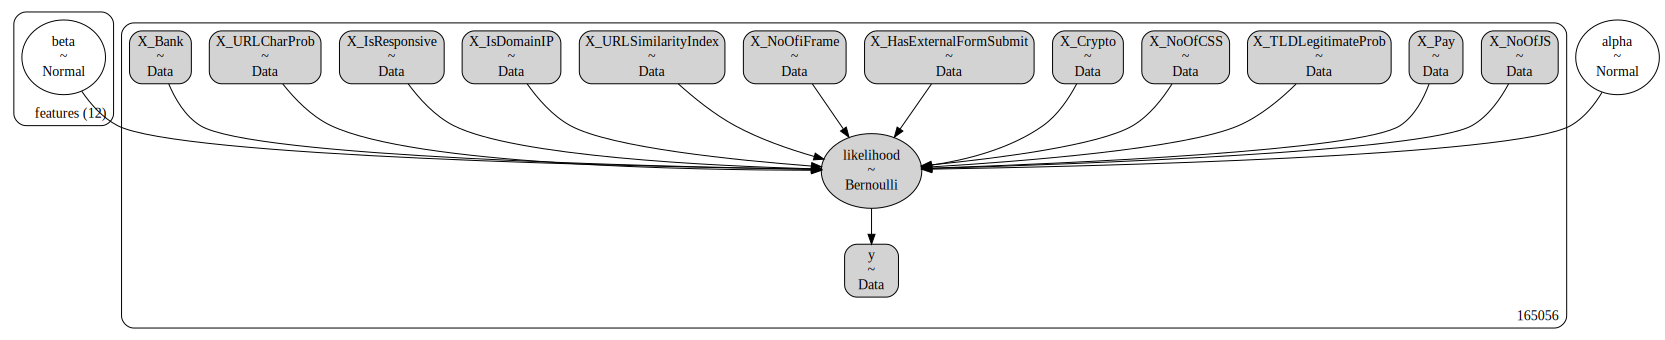

In [13]:
pm.model_to_graphviz(model_1)

In [14]:
with model_1:
  approx = pm.fit(20000)

Output()

# ELBO (Evidence Lower Bounds) e sua Importância na Inferência Variacional

O gráfico ELBO (Evidence Lower Bounds) é uma ferramenta crucial na avaliação da convergência de métodos de inferência variacional, como o ADVI. Este gráfico representa a diferença entre a distribuição aproximada da posterior e a verdadeira distribuição posterior. Idealmente, queremos que esta diferença seja a menor possível, indicando uma boa aproximação.

Durante o processo de otimização variacional, é comum observar algumas flutuações no gráfico ELBO, especialmente no início. Estes "picos" são típicos da fase inicial de otimização, onde o algoritmo ainda está explorando o espaço de parâmetros em busca de uma boa aproximação para a distribuição posterior.

## O Uso de `pm.summary` e a Interpretação do R-hat

Ao utilizar a função `pm.summary` para inspecionar os resultados da inferência variacional, podemos nos deparar com o valor `NaN` para o diagnóstico R-hat. É importante destacar que o R-hat é um indicador de convergência projetado especificamente para métodos MCMC (Monte Carlo via Cadeias de Markov). O R-hat compara a variação dentro das cadeias com a variação entre as cadeias para avaliar se as cadeias convergiram para a distribuição estacionária.

No contexto do ADVI, o conceito de R-hat não se aplica da mesma forma, pois estamos lidando com uma abordagem de otimização variacional, e não com cadeias de Markov. Portanto, um valor `NaN` para R-hat após a inferência variacional não indica um problema; simplesmente reflete a inaplicabilidade desta métrica para avaliar a convergência do ADVI.

Para avaliar a qualidade e a convergência da aproximação variacional, devemos nos concentrar em métricas e diagnósticos relevantes para métodos de inferência variacional, como o próprio gráfico ELBO.


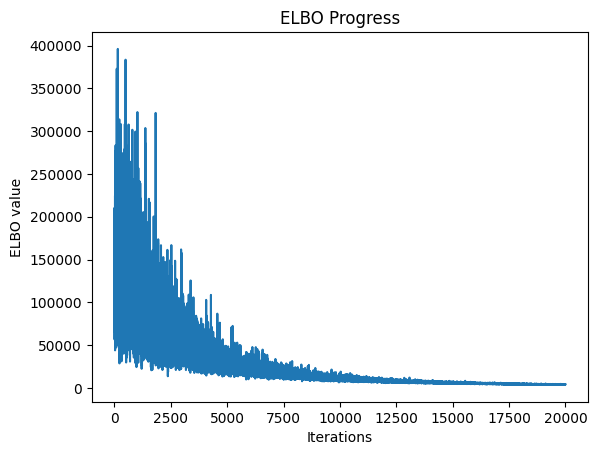

In [15]:
plt.plot(approx.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [16]:
with model_1:
  trace = approx.sample(10000)

In [17]:
pm.summary(trace)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.039,0.053,-0.134,0.064,0.001,0.000,9878.0,9415.0,NaN
beta[URLSimilarityIndex],6.000,0.227,5.570,6.425,0.002,0.002,9732.0,8993.0,NaN
beta[IsDomainIP],-0.994,0.898,-2.632,0.732,0.009,0.006,9952.0,9743.0,NaN
beta[TLDLegitimateProb],-0.867,0.109,-1.076,-0.666,0.001,0.001,9837.0,9779.0,NaN
beta[IsResponsive],1.240,0.061,1.127,1.358,0.001,0.000,9733.0,9641.0,NaN
beta[NoOfCSS],5.442,0.453,4.604,6.307,0.005,0.003,9902.0,9483.0,NaN
beta[NoOfJS],4.857,0.150,4.571,5.136,0.002,0.001,9447.0,9404.0,NaN
beta[HasExternalFormSubmit],1.218,0.244,0.770,1.687,0.002,0.002,9818.0,9876.0,NaN
beta[Bank],-0.074,0.076,-0.218,0.069,0.001,0.001,10191.0,9596.0,NaN
beta[Pay],0.963,0.077,0.822,1.113,0.001,0.001,10118.0,9521.0,NaN


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

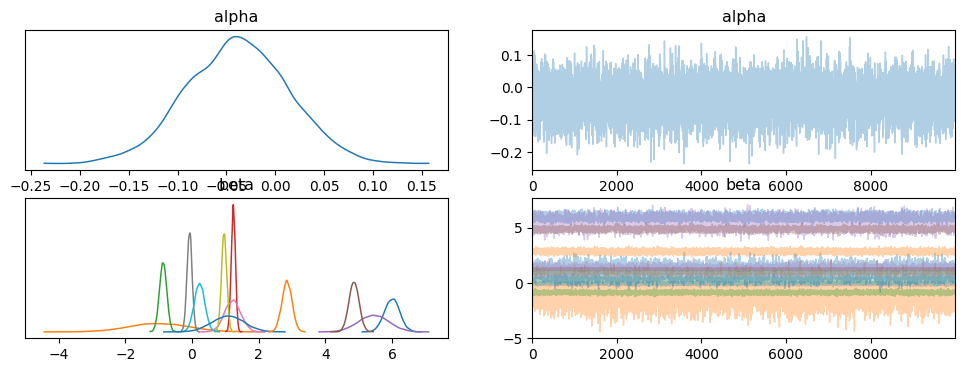

In [18]:
az.plot_trace(trace)

In [19]:
vars = {"X_"+column : X_test[column].values
    for column in X_test.columns if np.issubdtype(X_test[column].dtype, np.number)}
vars["y"] = y_test

In [20]:
with model_1:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

Output()

In [21]:
trace_post

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [22]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
binary_predictions = (mean_likelihood > 0.5).astype(int)

In [23]:
abs_diff = np.abs(y_test - binary_predictions)

df = pd.DataFrame({
    'URL': X_test["URL"],
    'y_test': y_test,
    'binary_predictions': binary_predictions,
    'abs_diff': abs_diff
})

df

,URL,y_test,binary_predictions,abs_diff
201633,https://www.panambrands.com,1,1,0
203611,https://www.rollingstone.de,1,1,0
131684,http://www.flickfaced.com,0,0,0
1456,http://cek58793690694674609.rf.gd/,0,0,0
235230,https://bcc.13-50-245-125.cprapid.com/info.php,0,0,0
...,...,...,...,...
102167,https://www.2pass.co.uk,1,1,0
201811,https://www.cse.lk,1,1,0
31655,https://www.trustonic.com,1,1,0
127238,http://att-107469.weeblysite.com/,0,0,0


In [26]:
errors = df["abs_diff"].sum()
acc = (len(df)-errors)/len(df)
print(f"Acuracia: {acc:.5f}")
print(f"Erros: {errors}")

Acuracia: 0.99518
Erros: 341


In [25]:
class1 = df["y_test"].sum()
class0 = len(df)-class1

print(f"Classe 0: {class0}")
print(f"Classe 1: {class1}")

Classe 0: 30192
Classe 1: 40547


A acurácia do modelo é de aproximadamente 99.52% e as classes possuem um desbalanceamento de 30.276 (classe 0) contra 40.463 (classe 1). Para entender melhor o desempenho do modelo nesse contexto de desbalanceamento, vamos investigar o recall, a precisão e o F1.

O recall, também conhecido como sensibilidade, mensura a capacidade do modelo de identificar corretamente todas as instâncias positivas da classe de interesse. Em outras palavras, ele indica qual proporção das instâncias realmente positivas foi identificada corretamente pelo modelo. Um recall de 1 (ou 100%) significa que o modelo identificou corretamente todas as instâncias positivas, sendo especialmente importante em cenários onde o custo de não detectar um positivo é alto, como em diagnósticos médicos.

Já a precisão mede a proporção das identificações positivas que foram de fato corretas. Diferentemente do recall, que se preocupa com todas as instâncias positivas reais, a precisão foca nas que o modelo afirmou ser positivas e quantas delas realmente eram. Uma precisão alta indica que, quando o modelo prediz uma instância como positiva, há uma grande chance de que esta previsão esteja correta. Isso é crucial em situações onde falsos positivos têm um grande custo associado, como em alarmes de segurança.

Por fim, o F1 mensura uma média harmônica entre precisão e recall, oferecendo um único indicador que leva em conta tanto a capacidade do modelo de identificar corretamente as instâncias positivas (recall) quanto a sua precisão em afirmar que uma instância é positiva. O F1 é particularmente útil quando você precisa de um equilíbrio entre precisão e recall, e é excelente para comparar modelos que operam em datasets desbalanceados ou quando as falsas positivas e negativas têm custos diferentes. Um F1 próximo de 1 indica um modelo muito bem ajustado, tanto em termos de precisão quanto de recall.

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, binary_predictions)

recall = recall_score(y_test, binary_predictions)

f1 = f1_score(y_test, binary_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9917
Recall: 1.0000
F1 Score: 0.9958


In [28]:
df[df["abs_diff"] == 1]

,URL,y_test,binary_predictions,abs_diff
142969,http://www.mellow60s.com,0,1,1
20414,http://www.cryptooa.com,0,1,1
29591,http://www.thereefrestaurant.com,0,1,1
30477,http://www.ausnz.net,0,1,1
46614,http://www.free-proxyserver.com,0,1,1
...,...,...,...,...
107679,http://www.tim.com,0,1,1
76478,http://w-s-a.co.uk/,0,1,1
146646,http://www.flo.cash,0,1,1
21735,http://www.aprilstudios.in,0,1,1


# Exercícios

1) Implemente uma regressão logística Bayesiana para o dataset: https://archive.ics.uci.edu/dataset/186/wine+quality
